In [ ]:
# importação de bibliotecas
import pandas as pd # manipulação de dados
import seaborn as sns # visualização de dados 
import statistics as sts # estatistica

In [ ]:
# Carrega os dados
# dataframe = dados salvos na memoria RAM = dados de uso mais rapido
df = pd.read_csv('/content/drive/MyDrive/datasets/Churn.csv', sep=';')

# Visualização dos dados
df.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
# Tamanho do dataframe
print(df.shape)
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')


(999, 12)
Rows: 999
Columns: 12


# Tratamento inicial

In [ ]:
# Primeiro problema do conjunto
# Nome das colunas

df.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito", "Ativo","Salario","Saiu"]
df.columns

Index(['Id', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo',
       'Produtos', 'TemCartCredito', 'Ativo', 'Salario', 'Saiu'],
      dtype='object')

In [ ]:
# Visualizar
df.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# Analise do dado

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              999 non-null    int64  
 1   Score           999 non-null    int64  
 2   Estado          999 non-null    object 
 3   Genero          991 non-null    object 
 4   Idade           999 non-null    int64  
 5   Patrimonio      999 non-null    int64  
 6   Saldo           999 non-null    int64  
 7   Produtos        999 non-null    int64  
 8   TemCartCredito  999 non-null    int64  
 9   Ativo           999 non-null    int64  
 10  Salario         992 non-null    float64
 11  Saiu            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


In [ ]:
df['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

## Analise da idade

In [ ]:
df['Idade'].agg(['min', 'max', 'mean'])

min     -20.000000
max     140.000000
mean     38.902903
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

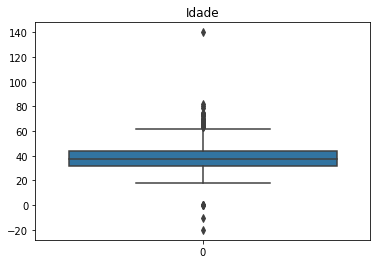

In [ ]:
sns.boxplot(df['Idade']).set_title('Idade')

In [ ]:
df.loc[ ( df['Idade'] < 0 ) | (df['Idade'] > 100 ) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


## Tratamento da idade



In [ ]:
#calular a mediana
mediana = sts.median(df['Idade'])
mediana

37

In [ ]:
# | (pipe) like or 
  
df.loc[ ( df['Idade'] < 0 ) | (df['Idade'] > 100 ), 'Idade' ] = mediana

In [ ]:
df.loc[ ( df['Idade'] < 0 ) | (df['Idade'] > 100 ) ] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
df['Idade'].agg(['min', 'max', 'mean'])

min      0.000000
max     82.000000
mean    38.903904
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

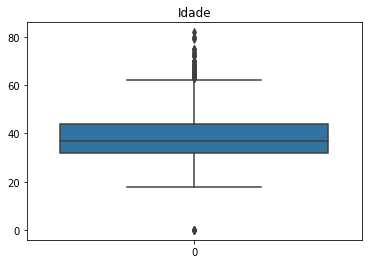

In [ ]:
sns.boxplot(df['Idade']).set_title('Idade')

## Tratamento de Estados

In [ ]:
df.loc[df['Estado'] == 37]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
agrupado = df.groupby( ['Estado'] ).size()
agrupado 

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [ ]:
df.loc[df['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'

df.groupby( ['Estado'] ).size()

Estado
PR    257
RS    484
SC    258
dtype: int64

## Tratamento de salarios

In [ ]:
df['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

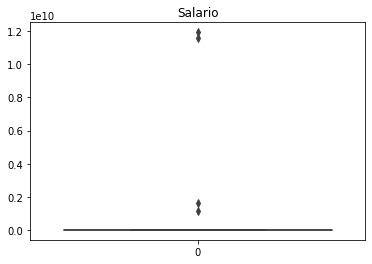

In [ ]:
sns.boxplot(df['Salario']).set_title('Salario')

In [ ]:
# Soma os valores null e apresenta na tela
df['Salario'].isnull().sum()

7

In [ ]:
# calculando a media do salario
mediana = sts.median(df['Salario'])

# Completa os valores null com a mediana 
df['Salario'].fillna(mediana, inplace=True)

# Soma os valores null e apresenta na tela
print(df['Salario'].isnull().sum())

0


In [ ]:
#outliers em salário, vamos considerar 2 desvios padrão
desv = sts.stdev(df['Salario'])
desv

528724131.4346197

In [ ]:
# outliers
df.loc[df['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [ ]:
mediana = sts.median(df['Salario'])
mediana

8641028.0

In [ ]:
df.loc[df['Salario'] >= 2 * desv,  'Salario'] = mediana

df.loc[df['Salario'] >= 2 * desv] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


# Tratamento de generos

In [ ]:
df.groupby(['Genero']).size()

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [ ]:
#verificamos novamente NANs
df['Genero'].isnull().sum()

8

In [ ]:
#preenche NAs com Masculino (moda)
df['Genero'].fillna('Masculino', inplace=True)

#verificamos novamente NANs
df['Genero'].isnull().sum()

0

In [ ]:
df.loc[df['Genero'] == 'M', 'Genero'] = 'Masculino'

In [ ]:
df.loc[df['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Feminino'

In [ ]:
df.groupby(['Genero']).size()

Genero
Feminino     464
Masculino    535
dtype: int64

# Visualização do dado

<Axes: xlabel='Estado'>

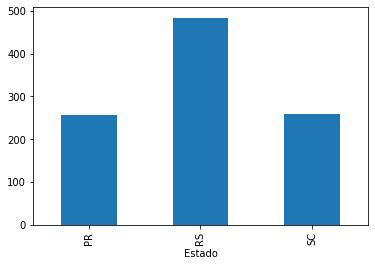

In [ ]:
df.groupby(['Estado']).size().plot.bar()

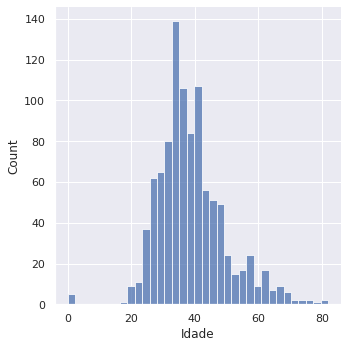

In [ ]:
sns.set_theme(style="darkgrid")
sns.displot(
  x=df["Idade"]
)

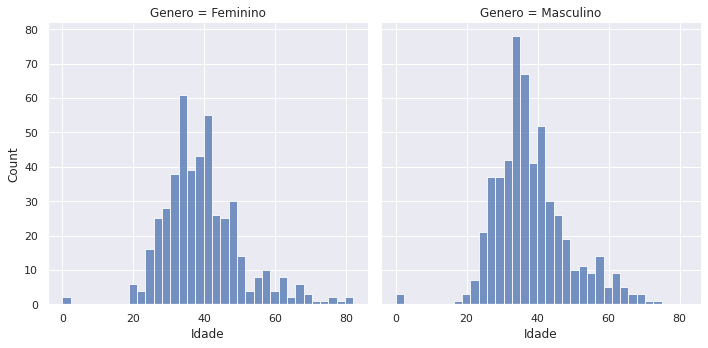

In [ ]:
sns.displot(
    df, x='Idade', col='Genero'
)